In [86]:
from ultralytics import YOLO

### Loading model

In [87]:
model = YOLO("../model/plates_YOLO.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_st

### Making an inference

In [88]:
from random import choice
from pathlib import Path
import cv2

val_images_path = Path("../data/images/val")
val_images = list(val_images_path.glob("*.png"))

random_image = choice(val_images)
result = model(cv2.imread(str(random_image)), save=True)


0: 480x640 1 license_plate, 50.1ms
Speed: 1.4ms preprocess, 50.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict


(-0.5, 399.5, 299.5, -0.5)

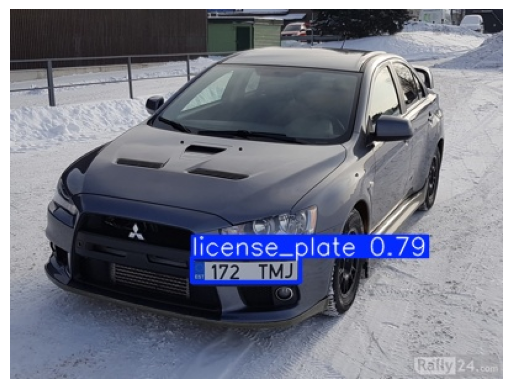

In [89]:
import matplotlib.pyplot as plt

img_path = Path('runs\\detect\\predict\\image0.jpg')
img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

### Crop image to the plate

tensor([192, 212,  88,  20], device='cuda:0', dtype=torch.int32)


(-0.5, 87.5, 19.5, -0.5)

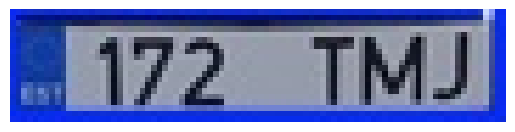

In [90]:
bbox = result[0].boxes.xywh.round().int().squeeze()
print(bbox)
x, y, w, h = bbox
img = img[y-(h//2):y+(h//2), x-(w//2):x+(w//2)]
plt.imshow(img)
plt.axis('off')

### Apply easyOCR

In [97]:
from easyocr import Reader

reader = Reader(["en"], gpu=True)

reader.readtext(img,
                allowlist="ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789",
                detail=0,
                width_ths=0.7,)

['172ATMJ']